# **Ïã¨Ïû•Í±¥Í∞ïÍ≥º ÌôòÏûê Î≥ÄÏàò Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑùÏùÑ ÌÜµÌïú Ïã¨Ïû•ÎßàÎπÑ ÏúÑÌóò ÏòàÏ∏°**


## *<2Ï£ºÏ∞® Í≥ºÏ†ï>* 

### ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/d/iamsouravbanerjee/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv
/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')

### ÎùºÎ≤® Ïù∏ÏΩîÎî© 
- ÏùºÎ∂Ä Ïó¥Ïùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏù¥ Ïà´ÏûêÍ∞Ä ÏïÑÎãå object(Î¨∏ÏûêÌòï)ÏúºÎ°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏñ¥ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôòÏùÑ Ìï¥Ïïº ÌïúÎã§.
- blood pressureÏùÄ ÏµúÍ≥†ÏπòÏôÄ ÏµúÏ†ÄÏπòÎ°ú Î∂ÑÎ¶¨ÌïòÏó¨ Îëê Í∞úÏùò Ïà´ÏûêÌòï Ïó¥Î°ú Î≥ÄÌôòÌïòÍ∏∞.

In [4]:
# Blood Pressure Ïó¥ ÏµúÍ≥†Ïπò/ÏµúÏ†ÄÏπò Î∂ÑÎ¶¨ Ìï®Ïàò
def split_blood_pressure(bp):
    if isinstance(bp, str):  # Î¨∏ÏûêÏó¥Î°ú Ï†ÄÏû•Îêú Í≤ΩÏö∞Îßå Ï≤òÎ¶¨
        try:
            systolic, diastolic = map(int, bp.split('/'))  # '/' Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ¶¨
            return systolic, diastolic
        except ValueError:
            return None, None  # ÏûòÎ™ªÎêú ÌòïÏãù Ï≤òÎ¶¨
    return None, None

# ÏµúÍ≥†ÏπòÏôÄ ÏµúÏ†ÄÏπòÎ•º Ï†ÄÏû•Ìï† Ïó¥ Ï∂îÍ∞Ä
df['Systolic_BP'], df['Diastolic_BP'] = zip(*df['Blood Pressure'].map(split_blood_pressure))

# Í∏∞Ï°¥ Blood Pressure Ïó¥ Ï†úÍ±∞
df.drop('Blood Pressure', axis=1, inplace=True)

In [5]:
# Ïûò Ï†ÅÏö©ÎêêÎÇò ÌôïÏù∏
df.head()

Patient ID  Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0    BMW7812   67    Male          208          72         0               0   
1    CZE1114   21    Male          389          98         1               1   
2    BNI9906   21  Female          324          72         1               0   
3    JLN3497   84    Male          383          73         1               1   
4    GFO8847   66    Male          318          93         1               1   

   Smoking  Obesity  Alcohol Consumption  ...        BMI Triglycerides  \
0        1        0                    0  ...  31.251233           286   
1        1        1                    1  ...  27.194973           235   
2        0        0                    0  ...  28.176571           587   
3        1        0                    1  ...  36.464704           378   
4        1        1                    0  ...  21.809144           231   

   Physical Activity Days Per Week  Sleep Hours Per Day    Country  \
0                                0                    6  Argentina   
1                                1                    7     Canada   
2                                4                    4     France   
3                                3                    4     Canada   
4                                1                    5   Thailand   

       Continent           Hemisphere  Heart Attack Risk  Systolic_BP  \
0  South America  Southern Hemisphere                  0          158   
1  North America  Northern Hemisphere                  0          165   
2         Europe  Northern Hemisphere                  0          174   
3  North America  Northern Hemisphere                  0          163   
4           Asia  Northern Hemisphere                  0           91   

   Diastolic_BP  
0            88  
1            93  
2            99  
3           100  
4            88  

[5 rows x 27 columns]

In [6]:
## int, obj, floatÌòï Îã§Ïãú ÎÇòÎà†ÏÑú ÏÑ†Ïñ∏
int_var = df[['Age','Cholesterol','Heart Rate','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption','Previous Heart Problems','Medication Use','Stress Level','Income','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day','Heart Attack Risk','Systolic_BP','Diastolic_BP' ]]
obj_var = df[['Patient ID','Sex','Diet','Country','Continent','Hemisphere' ]]
float_var =[['Exercise Hours Per Week','Sedentary Hours Per Day','BMI']]

### Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©
- Î≤îÏ£ºÌòïÎç∞Ïù¥ÌÑ∞Ïóê Ïà´Ïûê ÎùºÎ≤®ÎßÅÌïòÍ∏∞

In [7]:

# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî© (Label Encoding ÏÇ¨Ïö©)
for col in ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']:
    df[col] = df[col].astype('category').cat.codes

### float Í∞í Î∞òÏò¨Î¶ºÌïòÍ∏∞

- ÏûòÎ™ª ÏΩîÎî©Ìï† Í≤ΩÏö∞Î•º ÎåÄÎπÑÌï¥, ÏõêÎ≥∏ ÎÇ®Í≤®ÎÜìÍ∏∞

In [8]:
# float_var Î¶¨Ïä§Ìä∏ÌòïÏãùÏúºÎ°ú ÏÑ†Ïñ∏
float_var = ['Exercise Hours Per Week', 'Sedentary Hours Per Day', 'BMI']

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÑÎèÑÎ°ú Ï†ÄÏû•
original_df = df[float_var].copy()

# 1Ïùò ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶º (Ï†ïÏàò Î∂ÄÎ∂ÑÏóêÏÑú Î∞òÏò¨Î¶º)
df[float_var] = df[float_var].round().astype(int)  # Î∞òÏò¨Î¶º ÌõÑ Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò

print(df.head())  # df Ï†ÑÏ≤¥Î•º Ï∂úÎ†•ÌïòÎ©¥ Î∞òÏò¨Î¶ºÎêú Í∞í ÌôïÏù∏ Í∞ÄÎä•


  Patient ID  Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0    BMW7812   67    1          208          72         0               0   
1    CZE1114   21    1          389          98         1               1   
2    BNI9906   21    0          324          72         1               0   
3    JLN3497   84    1          383          73         1               1   
4    GFO8847   66    1          318          93         1               1   

   Smoking  Obesity  Alcohol Consumption  ...  BMI  Triglycerides  \
0        1        0                    0  ...   31            286   
1        1        1                    1  ...   27            235   
2        0        0                    0  ...   28            587   
3        1        0                    1  ...   36            378   
4        1        1                    0  ...   22            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Country  Continent  \
0                                0         

In [9]:
df.head()

Patient ID  Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0    BMW7812   67    1          208          72         0               0   
1    CZE1114   21    1          389          98         1               1   
2    BNI9906   21    0          324          72         1               0   
3    JLN3497   84    1          383          73         1               1   
4    GFO8847   66    1          318          93         1               1   

   Smoking  Obesity  Alcohol Consumption  ...  BMI  Triglycerides  \
0        1        0                    0  ...   31            286   
1        1        1                    1  ...   27            235   
2        0        0                    0  ...   28            587   
3        1        0                    1  ...   36            378   
4        1        1                    0  ...   22            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Country  Continent  \
0                                0                    6        0          5   
1                                1                    7        3          4   
2                                4                    4        6          3   
3                                3                    4        3          4   
4                                1                    5       16          1   

   Hemisphere  Heart Attack Risk  Systolic_BP  Diastolic_BP  
0           1                  0          158            88  
1           0                  0          165            93  
2           0                  0          174            99  
3           0                  0          163           100  
4           0                  0           91            88  

[5 rows x 27 columns]

### **TASK 1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**

**Í≤∞Ï∏°Ïπò ÌôïÏù∏**
- ÏóÜÏúºÎ©¥ Î¨∏ÏÑúÌôîÌï¥Ï£ºÍ∏∞

In [10]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
missing_values = df.isnull().sum()
print("Í≤∞Ï∏°Ïπò Í∞úÏàò:\n", missing_values)

# Í≤∞Ï∏°Ïπò ÏóÜÏùå -> Î¨∏ÏÑúÌôî
if missing_values.sum() == 0:
    print("Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏäµÎãàÎã§. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Îã®Í≥ÑÎ•º ÏÉùÎûµÌï©ÎãàÎã§.")

Í≤∞Ï∏°Ïπò Í∞úÏàò:
 Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Systolic_BP                        0
Diastolic_BP       

**Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨**

In [11]:
# Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞ Ïª¨ÎüºÎßå ÏÑ†ÌÉù
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Í∞Å Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò ÌôïÏù∏
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"'{column}' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: {len(outliers)}")


'Age' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Cholesterol' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Heart Rate' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Diabetes' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Family History' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Smoking' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 904
'Obesity' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Alcohol Consumption' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Exercise Hours Per Week' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Previous Heart Problems' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Medication Use' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Stress Level' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Sedentary Hours Per Day' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Income' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'BMI' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Triglycerides' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Physical Activity Days Per Week' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Sleep Hours Per Day' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Heart Attack Risk' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Systolic_BP' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
'Diastolic_BP' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 0


In [12]:
columns = ['Smoking']  # Ïù¥ÏÉÅÏπòÎ•º ÌôïÏù∏Ìï† Ïª¨Îüº Î¶¨Ïä§Ìä∏

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"'{column}' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò:", len(outliers))

'Smoking' Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Í∞úÏàò: 904


Smoking Ïª¨ÎüºÏóêÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä 904Í∞úÎÇò Í≤ÄÏ∂úÎêòÏóàÏúºÎØÄÎ°ú 
1. 0Í≥º 1Ïù¥ ÏïÑÎãå Í∞íÏù¥ ÏûàÎÇò ÌôïÏù∏
2. Ïñ¥Îñ§ ÏãùÏúºÎ°ú Ïù¥ÏÉÅÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÏãúÍ∞ÅÌôîÎ°ú ÌôïÏù∏

In [15]:
# 'Smoking' Ïª¨ÎüºÏùò Í≥†Ïú† Í∞í ÌôïÏù∏
print("Smoking Ïª¨ÎüºÏùò Í≥†Ïú† Í∞í:", df['Smoking'].unique())

# 0Í≥º 1Ïù¥ ÏïÑÎãå Í∞íÏùò Í∞úÏàò ÌôïÏù∏
invalid_values = df[~df['Smoking'].isin([0, 1])]
print("0Í≥º 1 Ïù¥Ïô∏ Í∞íÏùò Í∞úÏàò:", len(invalid_values))


Smoking Ïª¨ÎüºÏùò Í≥†Ïú† Í∞í: [1 0]
0Í≥º 1 Ïù¥Ïô∏ Í∞íÏùò Í∞úÏàò: 0


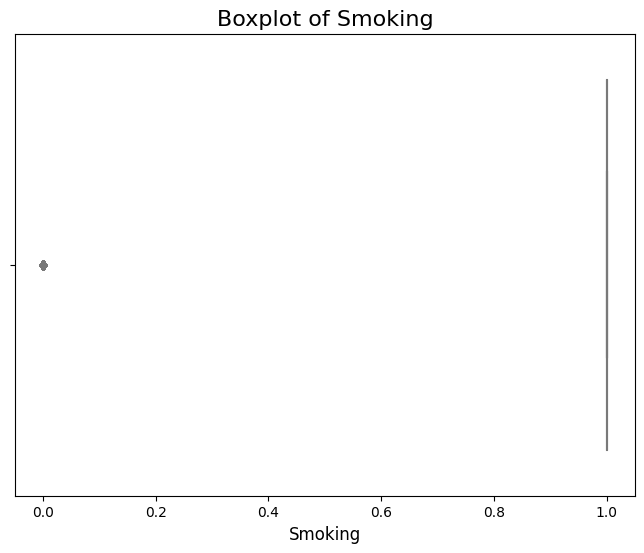

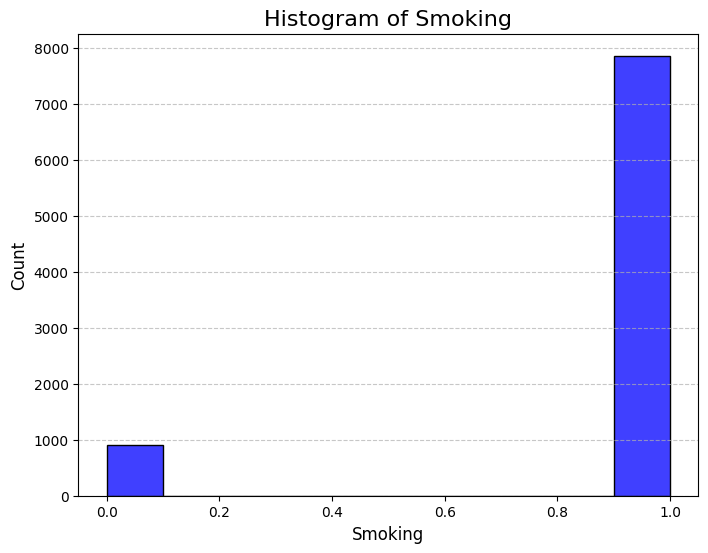

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Î∞ïÏä§ÌîåÎ°Ø
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smoking', color='lightblue')
plt.title('Boxplot of Smoking', fontsize=16)
plt.xlabel('Smoking', fontsize=12)
plt.show()

# ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Smoking', bins=10, kde=False, color='blue')
plt.title('Histogram of Smoking', fontsize=16)
plt.xlabel('Smoking', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Í∑∏ÎÉ• Ìù°Ïó∞ÏûêÍ∞Ä Îçî ÎßéÏùÄ Ìé∏Ìñ•Îêú Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.

Ìù°Ïó∞Ïûê ÎπÑÏú®: 89.68389820837612 %
ÎπÑÌù°Ïó∞Ïûê ÎπÑÏú®: 10.316101791623874 %


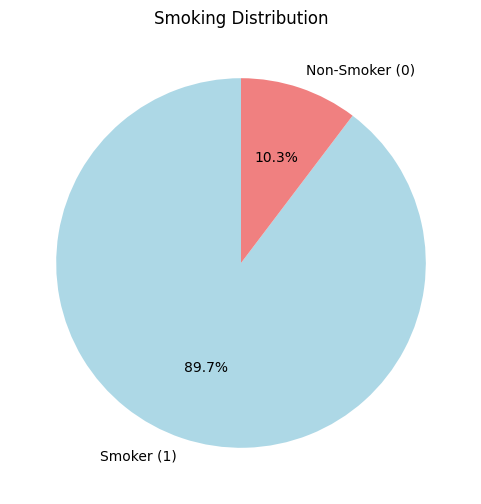

In [18]:
# Ìù°Ïó∞/ÎπÑÌù°Ïó∞ ÎπÑÏú® ÌôïÏù∏
smoking_counts = df['Smoking'].value_counts()
smoking_ratio = smoking_counts / len(df) * 100

print("Ìù°Ïó∞Ïûê ÎπÑÏú®:", smoking_ratio[1], "%")
print("ÎπÑÌù°Ïó∞Ïûê ÎπÑÏú®:", smoking_ratio[0], "%")

# ÎπÑÏú® ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
smoking_counts.plot.pie(labels=["Smoker (1)", "Non-Smoker (0)"], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Smoking Distribution')
plt.ylabel('')
plt.show()


SmokingÏùò Î∂ÑÌè¨Îäî Ïù¥ÏÉÅÏπòÍ∞Ä ÏïÑÎãàÎØÄÎ°ú ÏùºÎã® Îç∞Ïù¥ÌÑ∞Î•º Í∑∏ÎåÄÎ°ú Î∂ÑÏÑùÌï¥Î≥¥Ïûê.
- Îç∞Ïù¥ÌÑ∞Í∞Ä Ïã§Ï†ú Ï°∞ÏÇ¨ ÌôòÍ≤ΩÏùÑ Ïûò Î∞òÏòÅÌñàÎã§Îäî Í∞ÄÏ†ïÌïòÏóê!

### **TASK 2. ÌîºÏ≥ê ÏóîÏßÄÎãàÏñ¥ÎßÅ**

[ ÎßåÎì§Í≥†Ïûê ÌïòÎäî ÌååÏÉùÎ≥ÄÏàò ] 

- **BMIÏôÄ Ïö¥ÎèôÎüâÏùò ÏÉÅÌò∏ÏûëÏö© (Inactive Obesity)**
: BMIÏôÄ Ï£ºÍ∞Ñ Ïö¥Îèô ÏãúÍ∞Ñ(Exercise Hours Per Week)ÏùÑ Í≤∞Ìï©Ìï¥ ÎπÑÎßåÏù¥Î©¥ÏÑú Ïö¥ÎèôÎüâÏù¥ Ï†ÅÏùÄ ÏÇ¨ÎûåÏùò ÏúÑÌóòÎèÑÎ•º ÌëúÌòÑ.

- **Ïö¥Îèô Î∂ÄÏ°± + Ï¢åÏãù ÏÉùÌôúÏãúÍ∞Ñ (Inactive Lifestyle Index)**
: Ï£ºÍ∞Ñ Ïö¥ÎèôÏãúÍ∞Ñ Î∂ÄÏ°±Í≥º Ï¢åÏãù ÏÉùÌôúÏãúÍ∞ÑÏùÑ Ìï©ÏπòÎ©¥ 'Ïö¥Îèô Î∂ÄÏ°±'Ïù¥ÎùºÎäî ÎçîÏö± Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÎ•º ÎèÑÏ∂úÌï† Ïàò ÏûàÏùå


- **Í≥†ÌòàÏïï Ïó¨Î∂Ä (Hypertension Flag)**
ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í≥†ÌòàÏïïÏùÄ Ïã¨Ïû•ÎßàÎπÑÏùò Ï£ºÏöî ÏöîÏù∏ Ï§ë ÌïòÎÇòÏù¥Îã§. -> ÏµúÍ≥†ÌòàÏïï Î≥ÄÏàòÎ•º Ïù¥Ïö©Ìï¥ÏÑú Í≥†ÌòàÏïï Ïó¨Î∂ÄÎ•º Ïù¥ÏßÑ Î≥ÄÏàòÎ°ú 

- **ÏÜåÎìùÏàòÏ§Ä Î≥Ñ Ïã¨Ïû•Î≥ë Î¶¨Ïä§ÌÅ¨ Î∂ÑÏÑù**
: Income Ïª¨ÎüºÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏÜåÎìù ÏàòÏ§ÄÏùÑ Ïπ¥ÌÖåÍ≥†Î¶¨Ìôî -> ÏÜåÎìù ÏàòÏ§ÄÏóê Îî∞Îùº Ïã¨Ïû•Î≥ë Î¶¨Ïä§ÌÅ¨(Heart Attack Risk)Ïùò ÌèâÍ∑†Í∞íÏùÑ Í≥ÑÏÇ∞. ÏÜåÎìù ÏàòÏ§ÄÏù¥ ÎÇÆÏùÑÏàòÎ°ù Í±¥Í∞ï Í¥ÄÎ¶¨ ÏûêÏõêÏù¥ Î∂ÄÏ°±Ìï¥ Ïã¨Ïû•Î≥ë Î¶¨Ïä§ÌÅ¨Í∞Ä ÎÜíÏïÑÏßà Í∞ÄÎä•ÏÑ±ÏùÑ Î∂ÑÏÑù.-> ÏÜåÎìù ÏàòÏ§ÄÏùÑ Í∏∞Î∞òÏúºÎ°ú Ïã¨Ïû•Î≥ë Î¶¨Ïä§ÌÅ¨Î•º Ï°∞Ï†ïÌïú ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±.

In [24]:
# 1. BMIÏôÄ Ïö¥ÎèôÎüâÏùò ÏÉÅÌò∏ÏûëÏö©: ÎπÑÌôúÎèôÏ†Å ÎπÑÎßå - Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù ÎπÑÌôúÎèôÏ†Å ÎπÑÎßå Ï†ïÎèÑ ÎÜíÏùå
df['Inactive_Obesity'] = df['BMI'] / (df['Exercise Hours Per Week'] + 1)  # 0ÏúºÎ°ú ÎÇòÎàÑÎäî Í≤É Î∞©ÏßÄ

print(df[['Inactive_Obesity']].head())

   Inactive_Obesity
0          6.200000
1          9.000000
2          9.333333
3          3.272727
4          3.142857


In [25]:
# 2. Ïö¥Îèô Î∂ÄÏ°± + Ï¢åÏãù ÏÉùÌôúÏãúÍ∞Ñ - Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù Ïö¥ÎèôÎ∂ÄÏ°±Ï†ïÎèÑ ÎÜíÏùå
df['Inactive_Lifestyle_Index'] = df['Sedentary Hours Per Day'] - (df['Exercise Hours Per Week'] / 7)

print(df[['Inactive_Lifestyle_Index']].head())

   Inactive_Lifestyle_Index
0                  6.428571
1                  4.714286
2                  8.714286
3                  6.571429
4                  1.142857


In [26]:
# 3. Í≥†ÌòàÏïï Ïó¨Î∂Ä 1/0
df['Hypertension_Flag'] = ((df['Systolic_BP'] > 140) | (df['Diastolic_BP'] > 90)).astype(int)

print(df[['Hypertension_Flag']].head())

   Hypertension_Flag
0                  1
1                  1
2                  1
3                  1
4                  0


In [27]:
#4. ÏÜåÎìùÏàòÏ§ÄÎ≥Ñ Ïã¨Ïû•Î≥ë Î¶¨Ïä§ÌÅ¨

# ÏÜåÎìù ÏàòÏ§Ä Î∂ÑÎ•ò (Low, Middle, High)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

def categorize_income(income):
    if income <= Q1:
        return 'Low'
    elif income <= Q3:
        return 'Middle'
    else:
        return 'High'

df['Income_Level'] = df['Income'].apply(categorize_income)

# ÏÜåÎìù ÏàòÏ§ÄÎ≥Ñ Ïã¨Ïû•Î≥ë Î¶¨Ïä§ÌÅ¨ ÌèâÍ∑† Í≥ÑÏÇ∞
income_risk_avg = df.groupby('Income_Level')['Heart Attack Risk'].mean()
print("ÏÜåÎìù ÏàòÏ§ÄÎ≥Ñ Ïã¨Ïû•Î≥ë Î¶¨Ïä§ÌÅ¨ ÌèâÍ∑†:\n", income_risk_avg)

# ÏÜåÎìù-Ïã¨Ïû•Î≥ë ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ±
df['Income_Risk_Interaction'] = df['Income'] * df['Heart Attack Risk']

# Í≤∞Í≥º ÌôïÏù∏
print(df[['Income', 'Income_Level', 'Heart Attack Risk', 'Income_Risk_Interaction']].head())

ÏÜåÎìù ÏàòÏ§ÄÎ≥Ñ Ïã¨Ïû•Î≥ë Î¶¨Ïä§ÌÅ¨ ÌèâÍ∑†:
 Income_Level
High      0.373346
Low       0.353263
Middle    0.353116
Name: Heart Attack Risk, dtype: float64
   Income Income_Level  Heart Attack Risk  Income_Risk_Interaction
0  261404         High                  0                        0
1  285768         High                  0                        0
2  235282         High                  0                        0
3  125640       Middle                  0                        0
4  160555       Middle                  0                        0


üîç ÌõÑÏóê Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Í≥†Î†§Ìï† ÏÇ¨Ìï≠

1. ÏÜåÎìù ÏàòÏ§ÄÍ≥º Íµ≠Í∞ÄÎ≥Ñ Í≤ΩÏ†úÏàòÏ§ÄÏùÑ Í≤∞Ìï©
Íµ≠Í∞ÄÎ≥Ñ GDP Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÍ∞ÄÌï¥ÏÑú, Í∞úÏù∏ ÏÜåÎìùÏùÑ Íµ≠Í∞Ä ÌèâÍ∑† ÏÜåÎìùÍ≥º ÎπÑÍµêÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÏÉÅÎåÄÏ†Å ÏÜåÎìù ÏàòÏ§ÄÏùÑ Î∂ÑÏÑù.


2. ÏÜåÎìù ÏàòÏ§ÄÍ≥º Í±¥Í∞ï Î≥ÄÏàò Í≤∞Ìï©
ÏÜåÎìù ÏàòÏ§ÄÏù¥ Í±¥Í∞ï Í¥ÄÎ¶¨ ÏßÄÌëú(Ïö¥Îèô ÏãúÍ∞Ñ, Ïä§Ìä∏Î†àÏä§, Ï¢åÏãù ÏãúÍ∞Ñ Îì±)Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Î∂ÑÏÑù.